**PREDICTION AND VISUALIZATION OF CORONAVIRUS CASES**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
%matplotlib inline 

Collect data of Coronavirus in MOROCCO: We try to create database which contains number of comfirmed cases in each region in Morocco: Casablanca-Settat, Oriental....

In [ ]:
#uploading Morocco's Data
df_region_maroc=pd.read_excel("/content/Region_ Maroc_Covid-19.xls")
df_region_maroc.tail()

,Date/Region,Casablanca-Settat,Fes meknes,Rabat Sale Kenitra,Marrakech Safi,Tanger Tetouan Al Hoceima,Oriental,Souss-Massa,Beni Mellal-Khenifra,Daraa-tafilalet,Guelmim Oued Noun,Laayoune-Sakia El Hamra,Dakhla-Oued Ed Dahab
39,2020-04-09,404,167,209.0,258,115,86,20,41,67,1,4,2
40,2020-04-10,420,176,215.0,276,127,96,22,42,67,1,4,2
41,2020-04-11,447,194,226.0,285,141,104,23,47,71,1,4,2
42,2020-04-12,484,215,237.0,314,153,108,23,48,72,1,4,2
43,2020-04-13,521,233,NaN,335,169,123,24,48,78,1,4,2


Visualization of how Coronavirus spreads across Morocco's Regions:

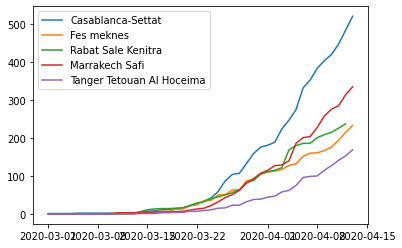

In [ ]:
plt.plot(df_region_maroc["Date/Region"],df_region_maroc["Casablanca-Settat"])
plt.plot(df_region_maroc["Date/Region"],df_region_maroc["Fes meknes"])
plt.plot(df_region_maroc["Date/Region"],df_region_maroc["Rabat Sale Kenitra"])
plt.plot(df_region_maroc["Date/Region"],df_region_maroc["Marrakech Safi"])
plt.plot(df_region_maroc["Date/Region"],df_region_maroc["Tanger Tetouan Al Hoceima"])

plt.legend(["Casablanca-Settat","Fes meknes","Rabat Sale Kenitra","Marrakech Safi","Tanger Tetouan Al Hoceima"])
      

Note: Since the Coronavirus started in MOROCCO the "2020-03-01" we couldn’t find enough data to make accurate conclusions. but we can say that this virus is increasing exponentially in some regions in morocco.


In [ ]:
#uploading data of other countries:
df_Confirmed=pd.read_csv("/content/time_series_covid_19_confirmed.csv")
df_deaths=pd.read_csv("/content/time_series_covid_19_deaths.csv")
df_recovered=pd.read_csv("/content/time_series_covid_19_recovered.csv")


In [ ]:
df_Confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19


Columns of df_confirmed

In [ ]:
col = df_Confirmed.keys()
col

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

Dates of confirmed cases (covid-19)

In [ ]:
Dates=col[4:]
Dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20'],
      dtype='object')

 Extract from data confirmed, deaths, recovered cases since "22-01-2020"



In [ ]:
confirmed_cases = df_Confirmed.loc[:, col[4]:col[-1]]
deaths_cases = df_deaths.loc[:, col[4]:col[-1]]
recovered_cases = df_recovered.loc[:, col[4]:col[-1]]
recovered_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0




1.   Daily increases for the most damaged countries in the whole world including morocco

2.   Calculating rates : the possibility of death + the possibility of recovering 




In [ ]:
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
recovery_morocco = []
mortality_morocco = []

total_recovered = [] 
total_active =[]
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
morocco_cases = []
france_cases = []
germany_cases = []
for i in Dates:
    confirmed_sum = confirmed_cases[i].sum()
    death_sum = deaths_cases[i].sum()
    recovered_sum = recovered_cases[i].sum()
    confirmed_morocco = df_Confirmed[df_Confirmed['Country/Region']=='Morocco'][i].sum()
    death_morocco = df_deaths[df_deaths['Country/Region']=='Morocco'][i].sum()
    recovered_morocco = df_recovered[df_recovered['Country/Region']=='Morocco'][i].sum()
    # confirmed, deaths, recovered, and active in the whole world 
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    #1
    # case studies 
    china_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='China'][i].sum())
    italy_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='Italy'][i].sum())
    us_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='US'][i].sum())
    spain_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='Spain'][i].sum())
    morocco_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='Morocco'][i].sum())
    france_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='France'][i].sum())
    germany_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='Germany'][i].sum())

    #2
    # calculate rates 
    mortality_rate.append(death_sum/confirmed_sum)
    mortality_morocco.append(death_morocco/confirmed_morocco)
    recovery_rate.append(recovered_sum/confirmed_sum)
    recovery_morocco.append(recovered_morocco/confirmed_morocco)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in long_scalars


Calculating the dialy increase for some countries in the dataset 

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
morocco_daily_increase = daily_increase(morocco_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)

In [ ]:
days_since_1_22 = np.array([i for i in range(len(Dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
italy_cases = np.array(italy_cases).reshape(-1, 1)
morocco_cases = np.array(morocco_cases).reshape(-1, 1)
france_cases = np.array(france_cases).reshape(-1, 1)
germany_cases = np.array(germany_cases).reshape(-1, 1)

Coronavirus in the world

In [ ]:
import folium  

world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_Confirmed)):
    folium.Circle(
        location=[df_Confirmed.iloc[i]['Lat'], df_Confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_Confirmed.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_Confirmed.iloc[i]['Province/State']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_Confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_Confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_Confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#eb0f32',
        fill_color='#f30757',
        fill=True).add_to(world_map)

world_map


**daily_increase**

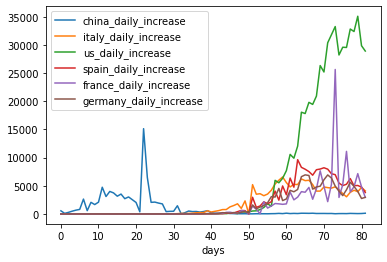

In [ ]:
plt.xlabel("days")
plt.plot(days_since_1_22,china_daily_increase)
plt.plot(days_since_1_22,italy_daily_increase)
plt.plot(days_since_1_22,us_daily_increase)
plt.plot(days_since_1_22,spain_daily_increase)
plt.plot(days_since_1_22,france_daily_increase)
plt.plot(days_since_1_22,germany_daily_increase)

plt.legend(["china_daily_increase","italy_daily_increase","us_daily_increase","spain_daily_increase","france_daily_increase","germany_daily_increase"])

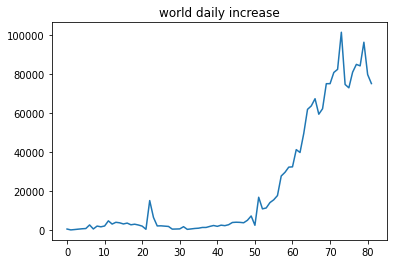

In [ ]:
plt.title("world daily increase")
plt.plot(days_since_1_22,world_daily_increase)


**Mortality and recovery rate in the world and morocco**

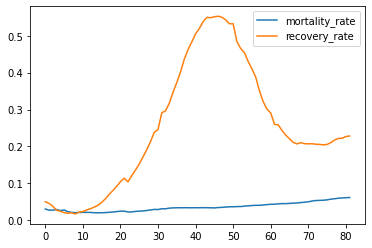

In [ ]:
plt.plot(days_since_1_22,mortality_rate)
plt.plot(days_since_1_22, recovery_rate)
plt.legend(["mortality_rate","recovery_rate"])

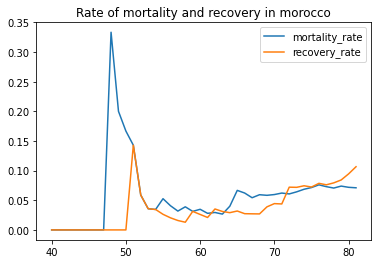

In [ ]:
plt.title("Rate of mortality and recovery in morocco")
plt.plot(days_since_1_22,mortality_morocco)
plt.plot(days_since_1_22, recovery_morocco)
plt.legend(["mortality_rate","recovery_rate"])

Future Forcast

In [ ]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(Dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

**Train data and test data of US:**

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, us_cases, test_size=0.15, shuffle=False) 

**Model for predicting the confirmed cases using linear regression.**




Slope: [994.45118743]
Intercept: -20779.688198757754
Root mean squared error:  738990995.8251967
R2 score: (train) 0.3467585797842977


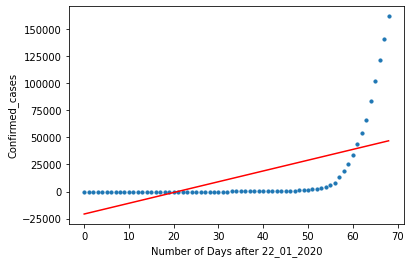

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train_confirmed, y_train_confirmed)
# Predict
y_predicted = regression_model.predict(X_train_confirmed)

# model evaluation
rmse = mean_squared_error(y_train_confirmed, y_predicted)
r2 = r2_score(y_train_confirmed, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)

print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: (train)', r2)

# plotting values

# data points
plt.scatter(X_train_confirmed, y_train_confirmed, s=10)
plt.xlabel('Number of Days after 22_01_2020')
plt.ylabel('Confirmed_cases')

# predicted values
plt.plot(X_train_confirmed, y_predicted, color='r')
plt.show()

This model is bad 'R2 score <50%'

Make Prediction using linear regression


In [ ]:
# Make a prediction 
X_new = [[82]]  # Predict how much is number of confirmed cases in US after 82 days "13/04/2020" 
print(regression_model.predict(X_new)) 

[60765.30917062]


Linear regression can't make good predictions for example after 82 days the number of confirmed cases is 581679 which is so far than [60765.30917062] "the number predicted" as well as the number of confirmes cases is an exponentially increasing function

**Polynomial Regression**

In [ ]:
# Fitting Polynomial Regression to the dataset 

from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) # We choose degree=4 after some attempts
X_poly = poly.fit_transform(X_train_confirmed) 
  
poly.fit(X_poly, y_train_confirmed) 
regression_model.fit(X_poly, y_train_confirmed) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

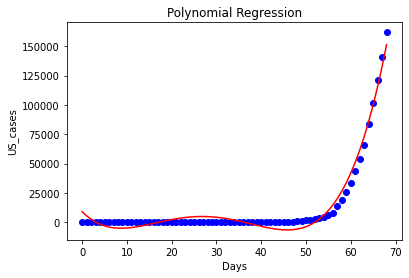

In [ ]:
# Visualising the Polynomial Regression results 
plt.scatter(X_train_confirmed, y_train_confirmed, color = 'blue') 
y_train_predicted = regression_model.predict(poly.fit_transform(X_train_confirmed))
plt.plot(X_train_confirmed, y_train_predicted, color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Days') 
plt.ylabel('US_cases') 
  
plt.show() 


In [ ]:
# predicting on test data-set
  y_test_predict = regression_model.predict(poly.fit_transform(X_test_confirmed))
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train_confirmed, y_train_predicted))
  r2_train = r2_score(y_train_confirmed, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test_confirmed, y_test_predict))
  r2_test = r2_score(y_test_confirmed, y_test_predict)
  print('Root mean squared error (train): ', rmse_train)

  print('R2 score: (train)', r2_train)
  print('R2 score: (test)', r2_test)



Root mean squared error (train):  4880.878379368058
R2 score: (train) 0.978941349357625
R2 score: (test) 0.9520769064450063


Polynomial Regression is better than linrear regreassion since R2 score of polynomial regression is higher than the linear regression and the RMSE of polynomial regression is lower than the linear regression

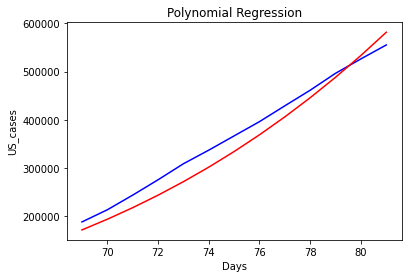

In [ ]:
# Visualising the Polynomial Regression results 
plt.plot(X_test_confirmed, y_test_confirmed, color = 'blue') 
  
plt.plot(X_test_confirmed, regression_model.predict(poly.fit_transform(X_test_confirmed)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Days') 
plt.ylabel('US_cases') 
  
plt.show() 


In [ ]:
# Predicting a new result with Polynomial Regression 
regression_model.predict(poly.fit_transform([[82]]))  ##array([632756.233168]) this numbre is not far than the real one '581,679'


array([632756.233168])

Morocco data

In [ ]:
X_train_confirmed_mo, X_test_confirmed_mo, y_train_confirmed_mo, y_test_confirmed_mo = train_test_split(days_since_1_22, morocco_cases, test_size=0.15, shuffle=False) 

Slope: [[3.43843624]]
Intercept: [-71.38509317]
Root mean squared error:  8209.709890761598
R2 score: (train) 0.36356065021816497


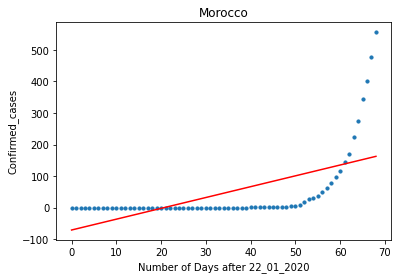

In [ ]:

# Fit the data(train the model)
regression_model.fit(X_train_confirmed_mo, y_train_confirmed_mo)
# Predict
y_predicted_mo = regression_model.predict(X_train_confirmed_mo)

# model evaluation
rmse_mo = mean_squared_error(y_train_confirmed_mo, y_predicted_mo)
r2_mo = r2_score(y_train_confirmed_mo, y_predicted_mo)

# printing values
print('Slope:' ,regression_model.coef_)

print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse_mo)
print('R2 score: (train)', r2_mo)

# plotting values

# data points
plt.scatter(X_train_confirmed_mo, y_train_confirmed_mo, s=10)
plt.xlabel('Number of Days after 22_01_2020')
plt.ylabel('Confirmed_cases')
plt.title("Morocco")
# predicted values
plt.plot(X_train_confirmed_mo, y_predicted_mo, color='r')
plt.show()

**Polynomial** **Regression**

In [ ]:
poly_mo = PolynomialFeatures(degree = 4) # We choose degree=4 after some attempts
X_poly_mo = poly_mo.fit_transform(X_train_confirmed_mo) 
  
poly_mo.fit(X_poly_mo, y_train_confirmed_mo) 
regression_model.fit(X_poly_mo, y_train_confirmed_mo) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

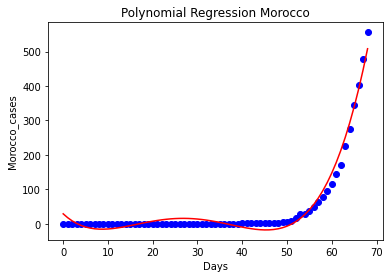

Root mean squared error :  16.37446485593469
R2 score: (train) 0.9792143579660936
R2 score: (test) 0.8941147990727734


In [ ]:
# Visualising the Polynomial Regression results 
plt.scatter(X_train_confirmed_mo, y_train_confirmed_mo, color = 'blue') 
y_train_predicted_mo = regression_model.predict(poly_mo.fit_transform(X_train_confirmed_mo))
plt.plot(X_train_confirmed_mo, y_train_predicted_mo, color = 'red') 
plt.title('Polynomial Regression Morocco') 
plt.xlabel('Days') 
plt.ylabel('Morocco_cases') 
  
plt.show() 
# predicting on test data-set
y_test_predict_mo = regression_model.predict(poly_mo.fit_transform(X_test_confirmed_mo))
# evaluating the model on training dataset
rmse_train_mo = np.sqrt(mean_squared_error(y_train_confirmed_mo, y_train_predicted_mo))
r2_train_mo = r2_score(y_train_confirmed_mo, y_train_predicted_mo)
  
# evaluating the model on test dataset
rmse_test_mo = np.sqrt(mean_squared_error(y_test_confirmed_mo, y_test_predict_mo))
r2_test_mo = r2_score(y_test_confirmed_mo, y_test_predict_mo)
print('Root mean squared error : ', rmse_train_mo)

print('R2 score: (train)', r2_train_mo)
print('R2 score: (test)', r2_test_mo)



In [ ]:
# Predicting a new result with Polynomial Regression 
regression_model.predict(poly_mo.fit_transform([[82]]))  ##array([2081.65917786])

array([2081.65917786])